# 1) Importing Data and Cleaning It

In [1]:
import pandas as pd
import re
import math
import numpy as np
import matplotlib.pyplot as plt

#Possible mods - where you start and what you see, etc.
csv_file_path = "/Users/michaelwein/Downloads/shoe_prices.csv"
df = pd.read_csv(csv_file_path)
df = df.drop_duplicates()
print(df.head())
print(df.shape)

      Brand            Model        Type Gender    Size      Color   Material  \
0      Nike     Air Jordan 1  Basketball    Men   US 10  Red/Black    Leather   
1    Adidas   Ultra Boost 21     Running    Men  US 9.5      Black  Primeknit   
2    Reebok  Classic Leather      Casual    Men   US 11      White    Leather   
3  Converse     Chuck Taylor      Casual  Women    US 8       Navy     Canvas   
4      Puma     Future Rider   Lifestyle  Women  US 7.5       Pink       Mesh   

  Price (USD)  
0    $170.00   
1    $180.00   
2     $75.00   
3     $55.00   
4     $80.00   
(925, 8)


In [2]:
def extract_size(string):
    # Use regular expression to find the numerical value
    match = re.search(r'\d+(\.\d+)?', string)
    if match:
        value = float(match.group())
        # Check if the decimal part is .99
        if value % 1.0 != 0.5:
            return math.ceil(value)
        else:
            return value
    else:
        return None
df['Numeric Size'] = df['Size'].apply(extract_size)
df['Numeric Price'] = df['Price (USD)'].apply(extract_size)

# 2) Visualizing Range of Shoe Sizes/Prices

In [3]:
shoe_sizes = sorted(df['Numeric Size'].unique())
print(shoe_sizes)
shoe_prices = sorted(df['Numeric Price'].unique())
print(shoe_prices)

[6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0]
[25, 35, 50, 55, 59, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 120, 125, 130, 135, 140, 150, 160, 165, 170, 175, 180, 200, 220, 250]


In [4]:
df_subset = df[['Numeric Price', 'Numeric Size']]

category_range = np.arange(len(shoe_prices))  # Use the number of unique shoe prices as categories
size_range = np.arange(len(shoe_sizes))  # Use the length of shoe_sizes as the size range

pd.options.mode.chained_assignment = None  # Suppress the annoying warning
df_subset.sort_values(by='Numeric Price', ascending=True, inplace=True)

# Group the DataFrame by 'price' and create a list of DataFrames
price_groups = [group for _, group in df_subset.groupby('Numeric Price')]

price_arrays = [group.sort_values(by='Numeric Size').values for group in price_groups]

# Create empty grids for prices and sizes
price_range = np.array(shoe_prices)  # Use the list of shoe prices as the price range

# Initialize a grid to store shoe counts
grid = np.zeros((len(price_range), len(size_range)))

# Populate the grid based on shoe data
for subarray in price_arrays:
    for entry in subarray:
        price, size = entry
        price_bin = np.argmin(np.abs(price_range - price))
        size_bin = shoe_sizes.index(size)
        grid[price_bin][size_bin] += 1
        
# Create a 2D array to store price, size, and count information
result_array = []

# Iterate through the grid and extract price, size, and count data
for price_idx, price in enumerate(price_range):
    entry = []
    for size_idx, size in enumerate(shoe_sizes):
        count = grid[price_idx][size_idx]
        entry.append([price, size, count])
    result_array.append(entry)

# Convert the result_array to a NumPy array if needed
new_grid = np.array(result_array)

display(pd.DataFrame(result_array))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,"[25, 6.0, 1.0]","[25, 6.5, 0.0]","[25, 7.0, 0.0]","[25, 7.5, 0.0]","[25, 8.0, 0.0]","[25, 8.5, 0.0]","[25, 9.0, 0.0]","[25, 9.5, 0.0]","[25, 10.0, 0.0]","[25, 10.5, 0.0]","[25, 11.0, 0.0]","[25, 11.5, 0.0]","[25, 12.0, 0.0]"
1,"[35, 6.0, 2.0]","[35, 6.5, 0.0]","[35, 7.0, 0.0]","[35, 7.5, 0.0]","[35, 8.0, 0.0]","[35, 8.5, 0.0]","[35, 9.0, 0.0]","[35, 9.5, 0.0]","[35, 10.0, 0.0]","[35, 10.5, 0.0]","[35, 11.0, 0.0]","[35, 11.5, 0.0]","[35, 12.0, 0.0]"
2,"[50, 6.0, 2.0]","[50, 6.5, 5.0]","[50, 7.0, 3.0]","[50, 7.5, 3.0]","[50, 8.0, 5.0]","[50, 8.5, 7.0]","[50, 9.0, 3.0]","[50, 9.5, 3.0]","[50, 10.0, 2.0]","[50, 10.5, 1.0]","[50, 11.0, 0.0]","[50, 11.5, 0.0]","[50, 12.0, 0.0]"
3,"[55, 6.0, 0.0]","[55, 6.5, 2.0]","[55, 7.0, 4.0]","[55, 7.5, 0.0]","[55, 8.0, 3.0]","[55, 8.5, 3.0]","[55, 9.0, 3.0]","[55, 9.5, 0.0]","[55, 10.0, 1.0]","[55, 10.5, 1.0]","[55, 11.0, 0.0]","[55, 11.5, 0.0]","[55, 12.0, 0.0]"
4,"[59, 6.0, 0.0]","[59, 6.5, 0.0]","[59, 7.0, 0.0]","[59, 7.5, 0.0]","[59, 8.0, 0.0]","[59, 8.5, 0.0]","[59, 9.0, 0.0]","[59, 9.5, 0.0]","[59, 10.0, 1.0]","[59, 10.5, 0.0]","[59, 11.0, 0.0]","[59, 11.5, 0.0]","[59, 12.0, 0.0]"
5,"[60, 6.0, 1.0]","[60, 6.5, 1.0]","[60, 7.0, 6.0]","[60, 7.5, 5.0]","[60, 8.0, 6.0]","[60, 8.5, 3.0]","[60, 9.0, 3.0]","[60, 9.5, 6.0]","[60, 10.0, 3.0]","[60, 10.5, 4.0]","[60, 11.0, 3.0]","[60, 11.5, 1.0]","[60, 12.0, 1.0]"
6,"[65, 6.0, 2.0]","[65, 6.5, 5.0]","[65, 7.0, 7.0]","[65, 7.5, 17.0]","[65, 8.0, 16.0]","[65, 8.5, 15.0]","[65, 9.0, 14.0]","[65, 9.5, 7.0]","[65, 10.0, 5.0]","[65, 10.5, 3.0]","[65, 11.0, 9.0]","[65, 11.5, 0.0]","[65, 12.0, 6.0]"
7,"[70, 6.0, 3.0]","[70, 6.5, 3.0]","[70, 7.0, 5.0]","[70, 7.5, 8.0]","[70, 8.0, 8.0]","[70, 8.5, 10.0]","[70, 9.0, 12.0]","[70, 9.5, 11.0]","[70, 10.0, 7.0]","[70, 10.5, 1.0]","[70, 11.0, 4.0]","[70, 11.5, 0.0]","[70, 12.0, 0.0]"
8,"[75, 6.0, 1.0]","[75, 6.5, 1.0]","[75, 7.0, 6.0]","[75, 7.5, 4.0]","[75, 8.0, 1.0]","[75, 8.5, 7.0]","[75, 9.0, 4.0]","[75, 9.5, 6.0]","[75, 10.0, 5.0]","[75, 10.5, 2.0]","[75, 11.0, 10.0]","[75, 11.5, 0.0]","[75, 12.0, 1.0]"
9,"[80, 6.0, 0.0]","[80, 6.5, 1.0]","[80, 7.0, 5.0]","[80, 7.5, 5.0]","[80, 8.0, 6.0]","[80, 8.5, 7.0]","[80, 9.0, 8.0]","[80, 9.5, 5.0]","[80, 10.0, 8.0]","[80, 10.5, 2.0]","[80, 11.0, 6.0]","[80, 11.5, 0.0]","[80, 12.0, 2.0]"


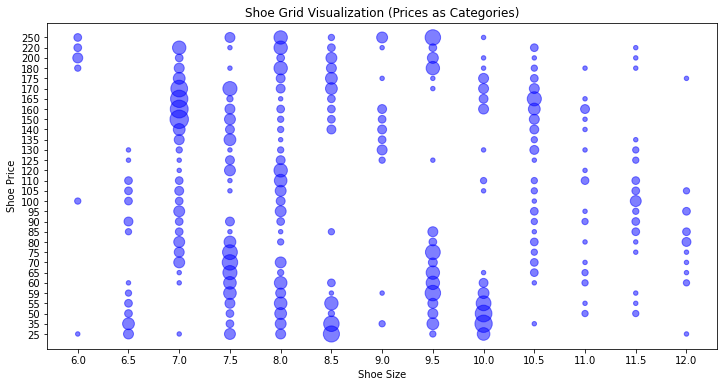

In [5]:
# Create a mapping from shoe prices to categorical indices
price_to_category = {price: idx for idx, price in enumerate(shoe_prices)}

# Initialize a grid to store shoe counts
grid = np.zeros((len(category_range), len(size_range)))

# Populate the grid based on shoe data
for subarray in price_arrays:
    for entry in subarray:
        price, size = entry
        category_bin = price_to_category.get(price, -1)  # Get the category index or -1 if price is not found
        if category_bin != -1:
            size_bin = shoe_sizes.index(size)
            grid[category_bin][size_bin] += 1
# Create a categorical scatter plot to visualize the grid with dots
plt.figure(figsize=(12, 6))

# Get the positions for the dots with x and y switched
x, y = np.meshgrid(category_range, size_range)
x = x.flatten()
y = y.flatten()

# Get the counts for each grid cell
counts = grid.flatten()

# Create the categorical scatter plot with dots, using 'counts' to determine dot size
plt.scatter(y, x, s=counts*20, c='blue', alpha=0.5)  

# Customize the axis labels using shoe sizes and shoe prices
plt.yticks(category_range, shoe_prices)
plt.xticks(size_range, shoe_sizes)

# Add labels and title
plt.xlabel("Shoe Size")
plt.ylabel("Shoe Price")
plt.title("Shoe Grid Visualization (Prices as Categories)")

# Show the plot
plt.show()

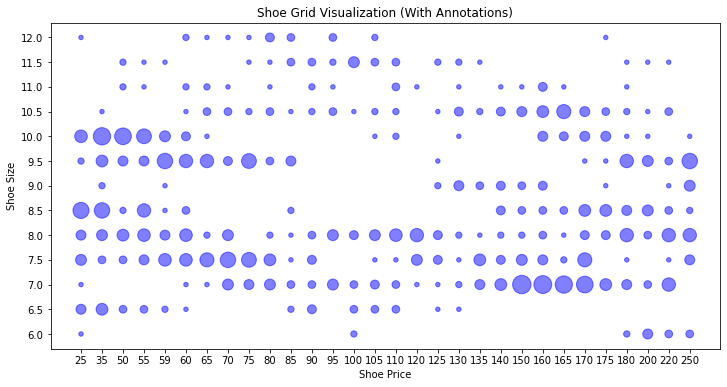

In [6]:
# Create a categorical scatter plot to visualize the grid with annotations
plt.figure(figsize=(12, 6))
x, y = np.meshgrid(category_range, size_range)
x = x.flatten()
y = y.flatten()
counts = grid.flatten()
plt.scatter(x, y, s=counts*20, c='blue', alpha=0.5)  
plt.xticks(category_range, shoe_prices)
plt.yticks(size_range, shoe_sizes)
plt.ylabel("Shoe Size")
plt.xlabel("Shoe Price")
plt.title("Shoe Grid Visualization (With Annotations)")

plt.show()

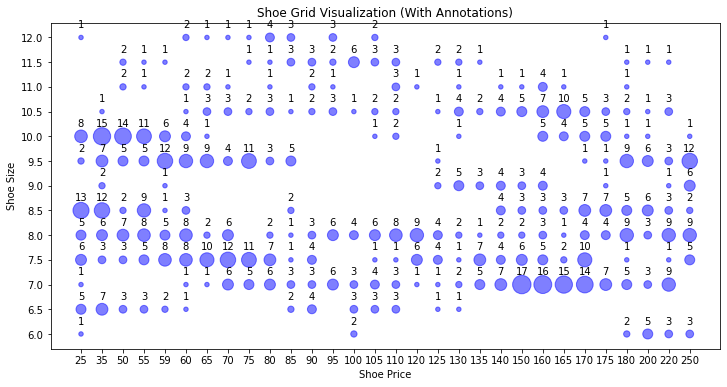

In [7]:
# Create a categorical scatter plot to visualize the grid with annotations
plt.figure(figsize=(12, 6))
x, y = np.meshgrid(category_range, size_range)
x = x.flatten()
y = y.flatten()
counts = grid.flatten()
plt.scatter(x, y, s=counts*20, c='blue', alpha=0.5)  
plt.xticks(category_range, shoe_prices)
plt.yticks(size_range, shoe_sizes)
plt.ylabel("Shoe Size")
plt.xlabel("Shoe Price")
plt.title("Shoe Grid Visualization (With Annotations)")

for i, count in enumerate(counts):
    if count > 0:
        plt.annotate(str(int(count)), (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

# 3) Getting List of Goals (Chosen Arbitrarily)

In [8]:
# Print the filtered DataFrame
possible_goals = df[(df['Brand'] == "Converse") & (df['Color'] == "Navy")]
possible_goals.drop_duplicates(subset = ['Numeric Size', "Numeric Price"])
display(possible_goals)

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD),Numeric Size,Numeric Price
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00,8.0,55
23,Converse,Jack Purcell,Casual,Women,US 7.5,Navy,Canvas,$65.00,7.5,65
115,Converse,Jack Purcell,Casual,Women,US 6,Navy,Canvas,$65.00,6.0,65
186,Converse,Jack Purcell,Casual,Women,US 6.5,Navy,Canvas,$65.00,6.5,65
458,Converse,All Star,Casual,Men,US 9,Navy,Canvas,$55.00,9.0,55
648,Converse,Jack Purcell,Casual,Men,US 8,Navy,Canvas,$65.00,8.0,65
787,Converse,Jack Purcell,Casual,Women,US 8.5,Navy,Canvas,$75.00,8.5,75
818,Converse,Jack Purcell,Casual,Men,US 8.5,Navy,Canvas,$65.00,8.5,65
920,Converse,Jack Purcell,Casual,Men,US 9,Navy,Canvas,$65.00,9.0,65


In [9]:
goals_indexes = []
for i in range(len(possible_goals)):
    i_row = possible_goals.iloc[i]
    i_price = i_row["Numeric Price"]
    i_size = i_row["Numeric Size"]
    for j in range(len(new_grid)):
        if i_price == new_grid[j][0][0]:
            for y in range(len(new_grid[j])):
                if new_grid[j][y][1] == i_size:
                    goals_indexes.append([j,y])                    
                    break
print(goals_indexes)

[[3, 4], [6, 3], [6, 0], [6, 1], [3, 6], [6, 4], [8, 5], [6, 5], [6, 6]]


# 4) Reinforcement Learning to Find Greatest WCD (just between two goals here)

In [10]:
# Define actions (up, down, left, right)
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Initialize the Q-table with zeros
num_states = np.prod(new_grid.shape)
num_actions = len(actions)

# Define hyperparameters
learning_rate = 0.1
discount_factor = .9
exploration_prob = 0.2
num_episodes = 1000

# Convert grid coordinates to a single integer state
def state_to_int(state):
    return state[0] * new_grid.shape[1] + state[1]

In [11]:
#Indices of first two goals
print(goals_indexes[0], goals_indexes[1])

[3, 4] [6, 3]


In [12]:
def get_available_actions(state, goal1,goal2):
    available_actions = []
    goal_y1 = goal1[0]
    goal_x1= goal1[1]
    goal_y2 = goal2[0]
    goal_x2 = goal2[1]
    if goal_x1<state[1] and goal_x2<state[1]:
        available_actions.append(actions[0])
    elif goal_x1>state[1] and goal_x2>state[1]:
        available_actions.append(actions[1])
    if goal_y1<state[0] and goal_y2<state[0]:
        available_actions.append(actions[2])
    elif goal_y1>state[0] and goal_y2>state[0]:
        available_actions.append(actions[3])
    return available_actions

In [13]:
def find_WCD(goal1, goal2, initial_state):
    state = initial_state
    q_table = np.zeros((num_states, num_actions))
    for episode in range(num_episodes):
        new_grid_copy = new_grid.copy()
        while True:
            available_actions = get_available_actions(state, goals_indexes[goal1], goals_indexes[goal2])
            if not available_actions:
                break
            if np.random.rand() < exploration_prob:
                #Action is the integer value of which one it is in actions
                action_index = actions.index(available_actions[np.random.choice(len(available_actions))])
            else:
                available_actions_index = np.argmax([q_table[state_to_int(state)][actions.index(a)] for a in available_actions])
                action_index = actions.index(available_actions[available_actions_index])
            next_state = (state[0] + actions[action_index][0], state[1] + actions[action_index][1])
            if abs(actions[action_index][0])==1:
                reward = 1
                while next_state[1]!=0 and new_grid_copy[next_state][2]==0:
                    next_state = (next_state[0],next_state[1]-1)
                while next_state[1]!=len(new_grid_copy[0])-1 and new_grid_copy[next_state][2]==0:# still 0
                    next_state = (next_state[0],next_state[1]+1)
            else:
                reward = new_grid_copy[state][2]
                while next_state[1]!=len(new_grid_copy[0])-1 and new_grid_copy[next_state][2]==0:# still 0
                    next_state = (next_state[0],next_state[1]+1)
                while next_state[1]!=0 and new_grid_copy[next_state][2]==0:
                    next_state = (next_state[0],next_state[1]-1)
                new_grid_copy[state][2] = 0 
                if state[0] == next_state[0] and next_state[1]==state[1]:#If there was nowhere to go
                    reward=-100
            q_table[state_to_int(state)][action_index] += learning_rate * (reward + discount_factor * np.max(q_table[state_to_int(next_state)]) - q_table[state_to_int(state)][action_index])

            state = next_state
    new_grid_copy = new_grid.copy()
    # Print the learned Q-table
    print("Learned Q-Table:")
    print(q_table)

    # Using the learned Q-table to find the optimal policy (path)
    state = initial_state  # Starting position
    path = [state]
    WCD = 0

    while True:  # Until no more actions are available, thus signaling WCD
        available_actions = get_available_actions(state, goals_indexes[goal1], goals_indexes[goal2])
        if not available_actions:
            break  # No available actions, exit loop
        # Choose the action with the highest Q-value
        available_actions_index = np.argmax([q_table[state_to_int(state)][actions.index(a)] for a in available_actions])
        action_index = actions.index(available_actions[available_actions_index])
        action = actions[action_index]
        next_state = (state[0] + action[0], state[1] + action[1])
        print(next_state)
        if abs(actions[action_index][0])==1:
            WCD+=1
            while next_state[1]!=0 and new_grid_copy[next_state][2]==0:
                next_state = (next_state[0], next_state[1]-1)
            while next_state[1]!=len(new_grid_copy[0])-1 and new_grid_copy[next_state][2]==0:# still 0
                next_state = (next_state[0], next_state[1]+1)
        else:
            WCD+=new_grid_copy[state][2]
            while next_state[1]!=len(new_grid_copy[0])-1 and new_grid_copy[next_state][2]==0:# still 0
                next_state = (next_state[0],next_state[1]+1)
                print("hello")
            while next_state[1]!=0 and new_grid_copy[next_state][2]==0:
                next_state = (next_state[0],next_state[1]-1)
                print("hell")
            new_grid_copy[state][2] = 0
        print("hey")
        path.append(next_state)
        state = next_state
    print(q_table[state_to_int((2,0))])
    print("Worst Path: ")
    print(path)
    print(WCD)

In [14]:
find_WCD(0,1,(0,0))

Learned Q-Table:
[[  0.  -10.    0.    0.1]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 ...
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]
 [  0.    0.    0.    0. ]]
(1, 0)
hey
(2, 0)
hey
(2, 1)
hey
(2, 2)
hey
(2, 3)
hey
(3, 3)
hey
(3, 3)
hello
hey
[0.  0.2 0.  0. ]
Worst Path: 
[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 2), (3, 4)]
17.0


# 5) Using WCD to Test Modifications - changing initial state to middle point 

In [15]:
starting_x_index = int((goals_indexes[0][0] + goals_indexes[1][0])/2)
starting_y_index = int((goals_indexes[0][1] + goals_indexes[1][1])/2)
find_WCD(0,1,(starting_x_index,starting_x_index))

Learned Q-Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0. 0. 0. 0.]
Worst Path: 
[(4, 4)]
0


# Looks like we have a winner!

# Possible Next Steps 
1) Expanding to include 2+ goals 

2) Creating algorithm that can find an effective modification itself

3) Including more than one type of modification